In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [37]:
data = pd.read_csv('/content/drive/MyDrive/Heart Disease data/Heart Disease data.csv')
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0     1.00      2   
1   53    1   0       140   203    1        0      155      1     3.10      0   
2   70    1   0       145   174    0        1      125      1     2.60      0   
3   61    1   0       148   203    0        1      161      0     0.00      2   
4   62    0   0       138   294    1        1      106      0     1.90      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [38]:
# Define new column names
new_column_names = [
    'age',
    'Sex',
    'ChestPainType',
    'restingBP',
    'cholestoral',
    'fasting blood sugar',
    'RestingECG',
    'maximum heart rate achieved',
    'ExerciseAngina',
    'oldpeak',
    'ST_Slope',
    'ca',
    'thal',
    'HeartDisease'
]

In [39]:
# Replace column names
data.columns = new_column_names

# Print the DataFrame to verify the change

data.head()

age  Sex  ChestPainType  restingBP  cholestoral  fasting blood sugar  \
0   52    1              0        125          212                    0   
1   53    1              0        140          203                    1   
2   70    1              0        145          174                    0   
3   61    1              0        148          203                    0   
4   62    0              0        138          294                    1   

   RestingECG  maximum heart rate achieved  ExerciseAngina  oldpeak  ST_Slope  \
0           1                          168               0     1.00         2   
1           0                          155               1     3.10         0   
2           1                          125               1     2.60         0   
3           1                          161               0     0.00         2   
4           1                          106               0     1.90         1   

   ca  thal  HeartDisease  
0   2     3             0  
1   0     3             0  
2   0     3             0  
3   1     3             0  
4   3     2             0

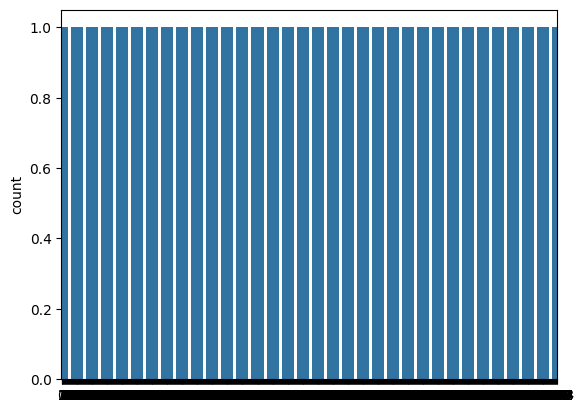

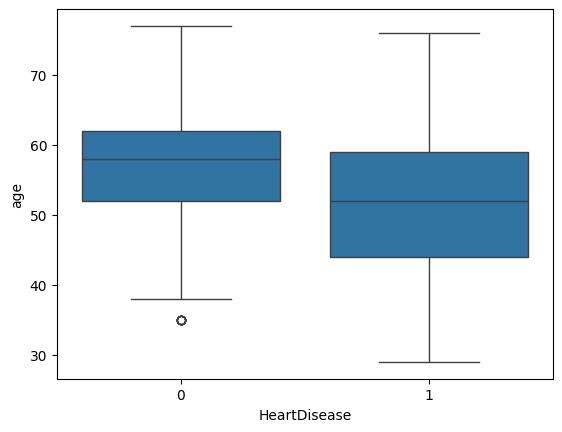

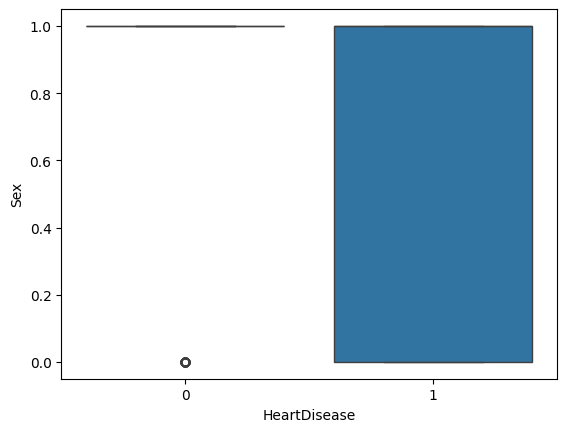

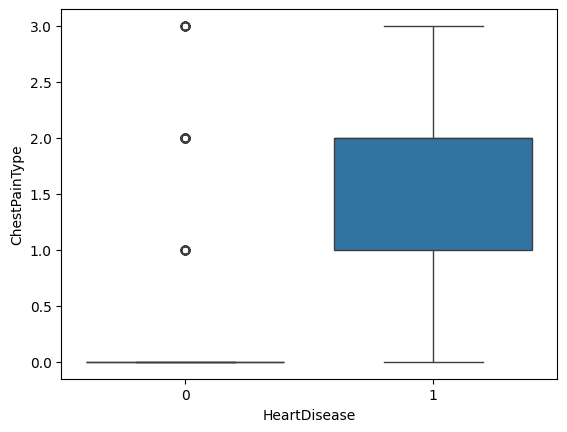

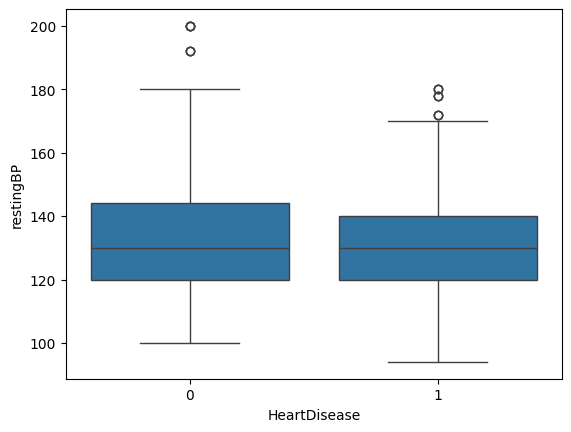

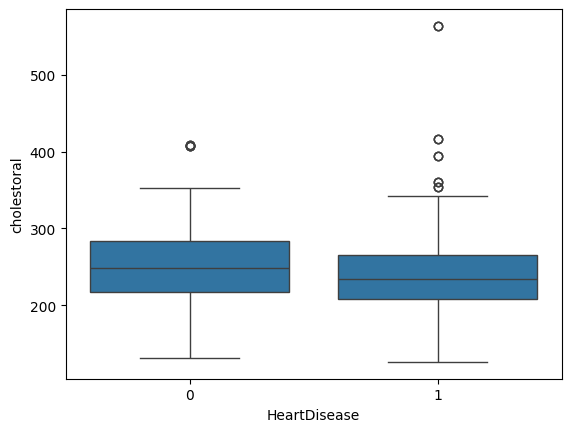

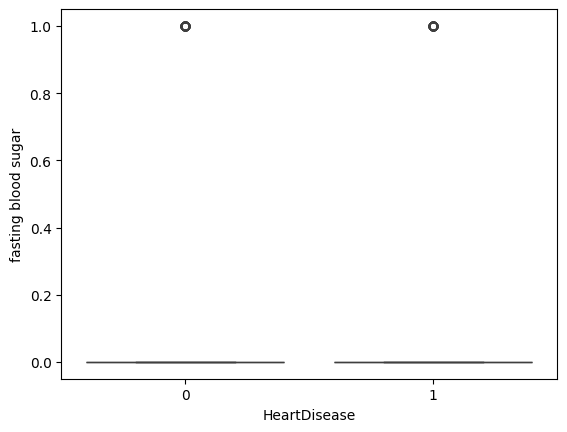

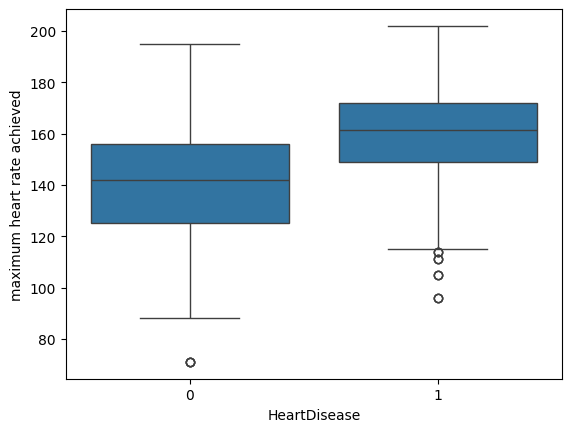

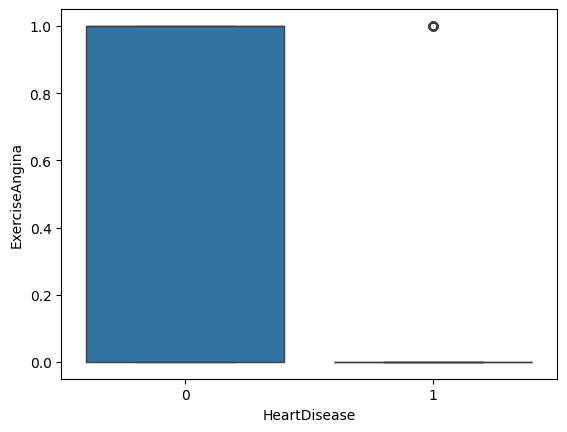

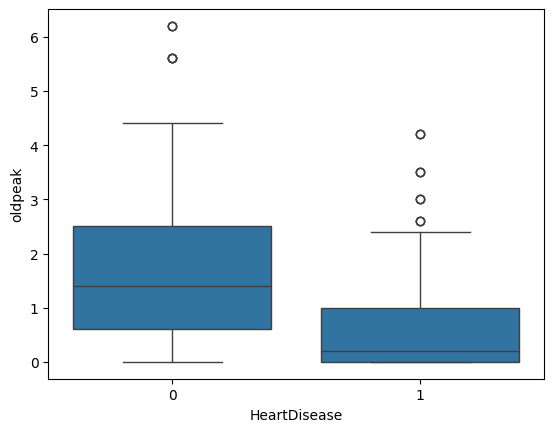

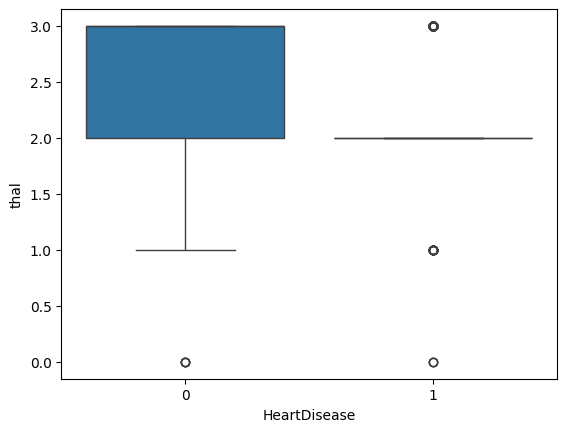

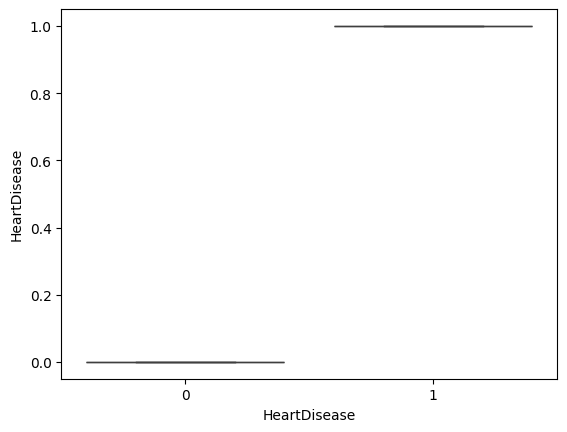

In [40]:
# prompt:

import matplotlib.pyplot as plt
# Data Exploration

# Check for missing values
data.isnull().sum()

# Get descriptive statistics of the data
data.describe()

# Check the distribution of target variable
sns.countplot(data['HeartDisease'])
plt.show()

# Analyze the relationship between features and target
for col in data.columns:
  if data[col].dtype != 'object':
    sns.boxplot(x='HeartDisease', y=col, data=data)
    plt.show()


In [41]:
data.columns

Index(['age', 'Sex', 'ChestPainType', 'restingBP', 'cholestoral',
       'fasting blood sugar', 'RestingECG', 'maximum heart rate achieved',
       'ExerciseAngina', 'oldpeak', 'ST_Slope', 'ca', 'thal', 'HeartDisease'],
      dtype='object')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1025 non-null   int64  
 1   Sex                          1025 non-null   int64  
 2   ChestPainType                1025 non-null   int64  
 3   restingBP                    1025 non-null   int64  
 4   cholestoral                  1025 non-null   int64  
 5   fasting blood sugar          1025 non-null   int64  
 6   RestingECG                   1025 non-null   int64  
 7   maximum heart rate achieved  1025 non-null   int64  
 8   ExerciseAngina               1025 non-null   int64  
 9   oldpeak                      1025 non-null   float64
 10  ST_Slope                     1025 non-null   int64  
 11  ca                           1025 non-null   int64  
 12  thal                         1025 non-null   int64  
 13  HeartDisease      

In [43]:
data.describe().T

count   mean   std    min    25%    50%    75%  \
age                         1025.00  54.43  9.07  29.00  48.00  56.00  61.00   
Sex                         1025.00   0.70  0.46   0.00   0.00   1.00   1.00   
ChestPainType               1025.00   0.94  1.03   0.00   0.00   1.00   2.00   
restingBP                   1025.00 131.61 17.52  94.00 120.00 130.00 140.00   
cholestoral                 1025.00 246.00 51.59 126.00 211.00 240.00 275.00   
fasting blood sugar         1025.00   0.15  0.36   0.00   0.00   0.00   0.00   
RestingECG                  1025.00   0.53  0.53   0.00   0.00   1.00   1.00   
maximum heart rate achieved 1025.00 149.11 23.01  71.00 132.00 152.00 166.00   
ExerciseAngina              1025.00   0.34  0.47   0.00   0.00   0.00   1.00   
oldpeak                     1025.00   1.07  1.18   0.00   0.00   0.80   1.80   
ST_Slope                    1025.00   1.39  0.62   0.00   1.00   1.00   2.00   
ca                          1025.00   0.75  1.03   0.00   0.00   0.00   1.00   
thal                        1025.00   2.32  0.62   0.00   2.00   2.00   3.00   
HeartDisease                1025.00   0.51  0.50   0.00   0.00   1.00   1.00   

                               max  
age                          77.00  
Sex                           1.00  
ChestPainType                 3.00  
restingBP                   200.00  
cholestoral                 564.00  
fasting blood sugar           1.00  
RestingECG                    2.00  
maximum heart rate achieved 202.00  
ExerciseAngina                1.00  
oldpeak                       6.20  
ST_Slope                      2.00  
ca                            4.00  
thal                          3.00  
HeartDisease                  1.00

In [44]:
### Exploratory Data Analysis

# Dividing features into Numerical and Categorical

col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)


Categorical Features : Sex ChestPainType fasting blood sugar RestingECG ExerciseAngina ST_Slope ca thal HeartDisease
Numerical Features : age restingBP cholestoral maximum heart rate achieved oldpeak


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

Text(0.5, 1.0, 'Distribution: HeartDisease')

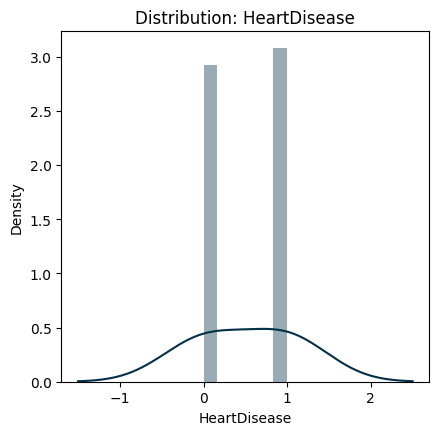

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 and categorical_features are defined somewhere above this snippet

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
subplot_count = ax.size  # Total number of subplots available

for i in range(min(len(categorical_features) - 1, subplot_count)):  # Adjusting the loop to not exceed the subplot grid
    colors = ["#023047", "#FF000D"]
    plt.subplot(3, 2, i+1)  # Subplot positions are 1-indexed
    sns.distplot(df1[categorical_features[i]], kde_kws={'bw': 1}, color=colors[0])
    title = 'Distribution: ' + categorical_features[i]
    plt.title(title)

# For the last categorical feature, creating a separate figure
plt.figure(figsize=(4.75, 4.55))
sns.distplot(df1[categorical_features[-1]], kde_kws={'bw': 1}, color=colors[0])
title = 'Distribution: ' + categorical_features[-1]
plt.title(title)


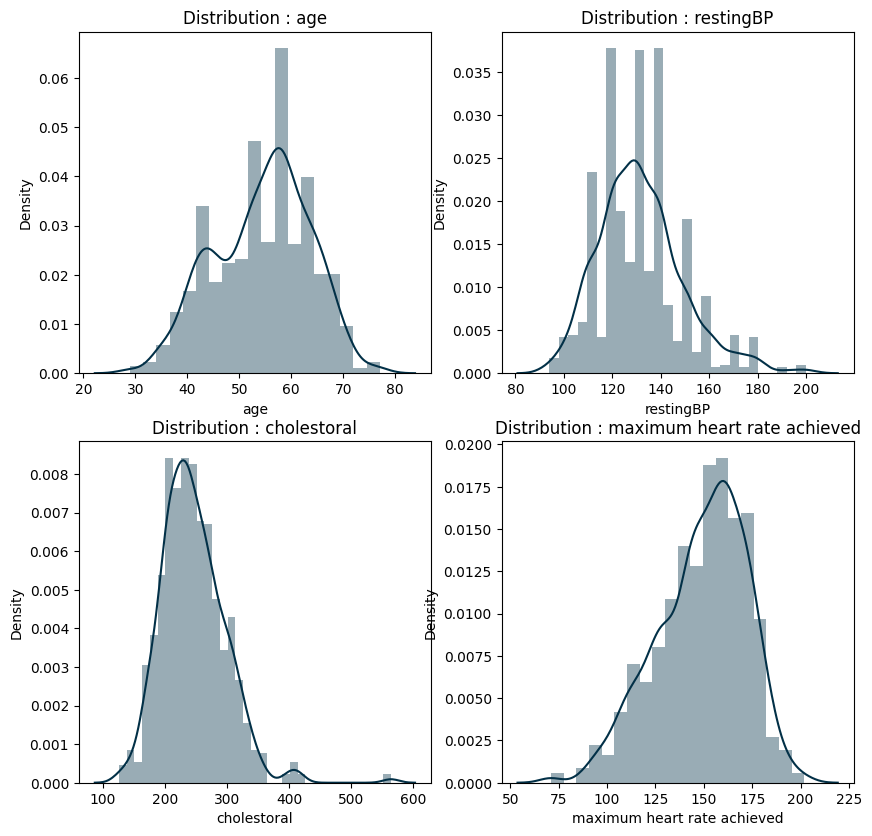

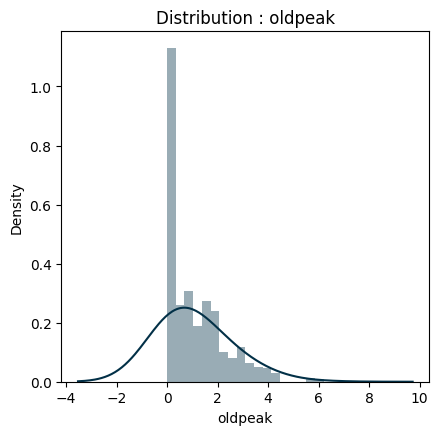

In [47]:
###   Numerical Features

#  Distribution of Numerical Features

fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is a pandas DataFrame with a 'HeartDisease' column
# Example setup:
# data = pd.DataFrame({
#     'HeartDisease': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes']
# })

# Calculating proportions for the pie chart
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

# Defining colors for both plots
colors = ["#023047", "#FF000D"]  # Ensure this matches your desired color scheme

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')

# Count plot
plt.subplot(1, 2, 2)
ax = sns.countplot(x='HeartDisease', data=data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Cases of Heart Disease')

plt.show()



In [54]:
###  Categorical Features vs Target Variable (HeartDisease)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame and 'categorical_features' list are defined
# Assuming 'colors' list is defined

num_features = len(categorical_features) - 1  # Number of features you want to plot
cols = 2  # Number of columns in the subplot grid
rows = (num_features + cols - 1) // cols  # Calculate rows needed, rounded up

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 15))

for i in range(num_features):
    # Calculate current row and column
    row = i // cols
    col = i % cols
    ax = sns.countplot(x=categorical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black', ax=axs[row, col])
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, "%d" % rect.get_height(), horizontalalignment='center', fontsize=11)
    ax.set_title(categorical_features[i] + ' vs HeartDisease')
    ax.legend(['No Heart Disease', 'Heart Disease'])

plt.tight_layout()  # Adjust the layout to make sure everything fits without overlapping
plt.show()


In [56]:
###  Categorical Features vs Positive Heart Disease Cases

sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['fasting blood sugar'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

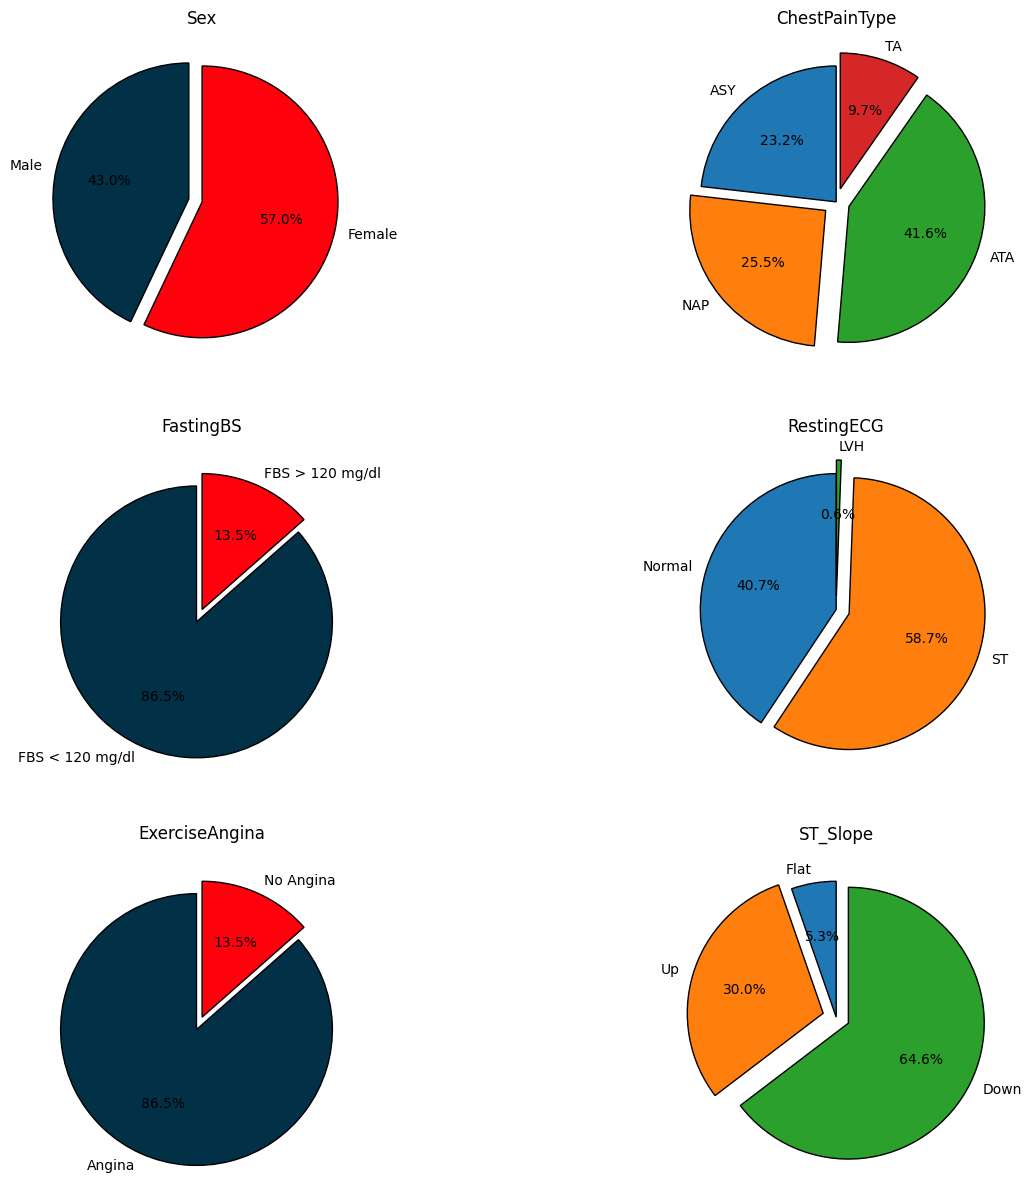

In [57]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

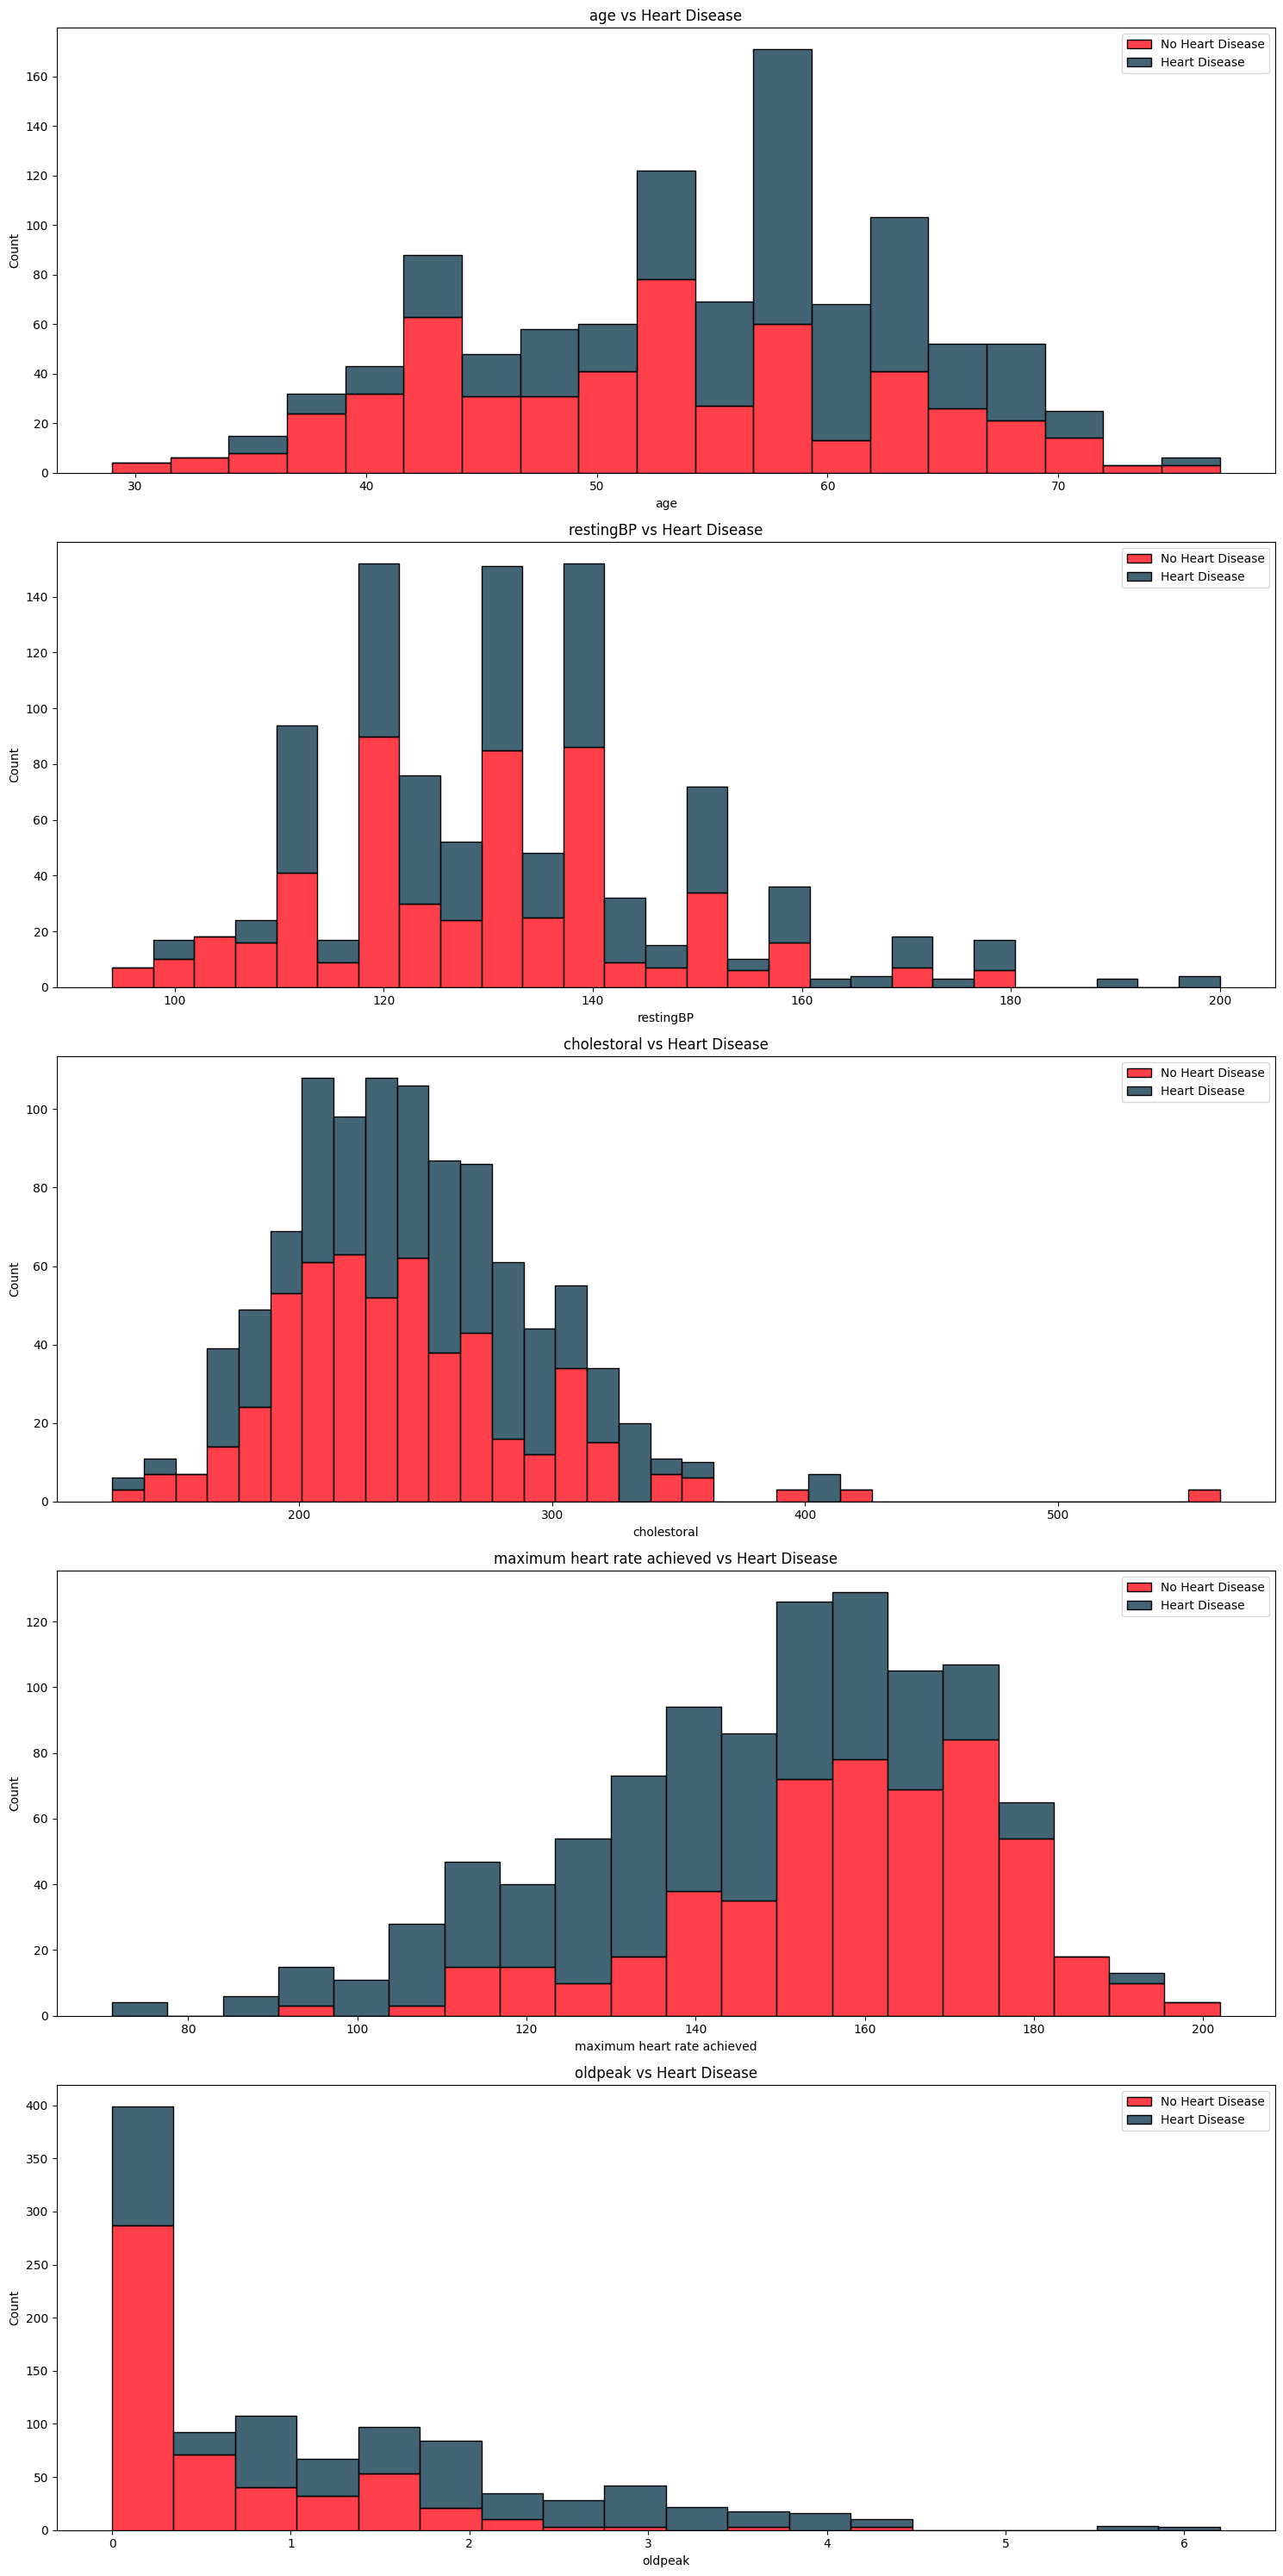

In [59]:
###  Numerical Features vs Target Variable (HeartDisease)

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 30))

for i, feature in enumerate(numerical_features):
    plt.subplot(5, 1, i+1)
    sns.histplot(data=data, x=feature, hue="HeartDisease", palette=colors, edgecolor='black', multiple="stack")
    plt.title(f'{feature} vs Heart Disease')
    plt.legend(['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

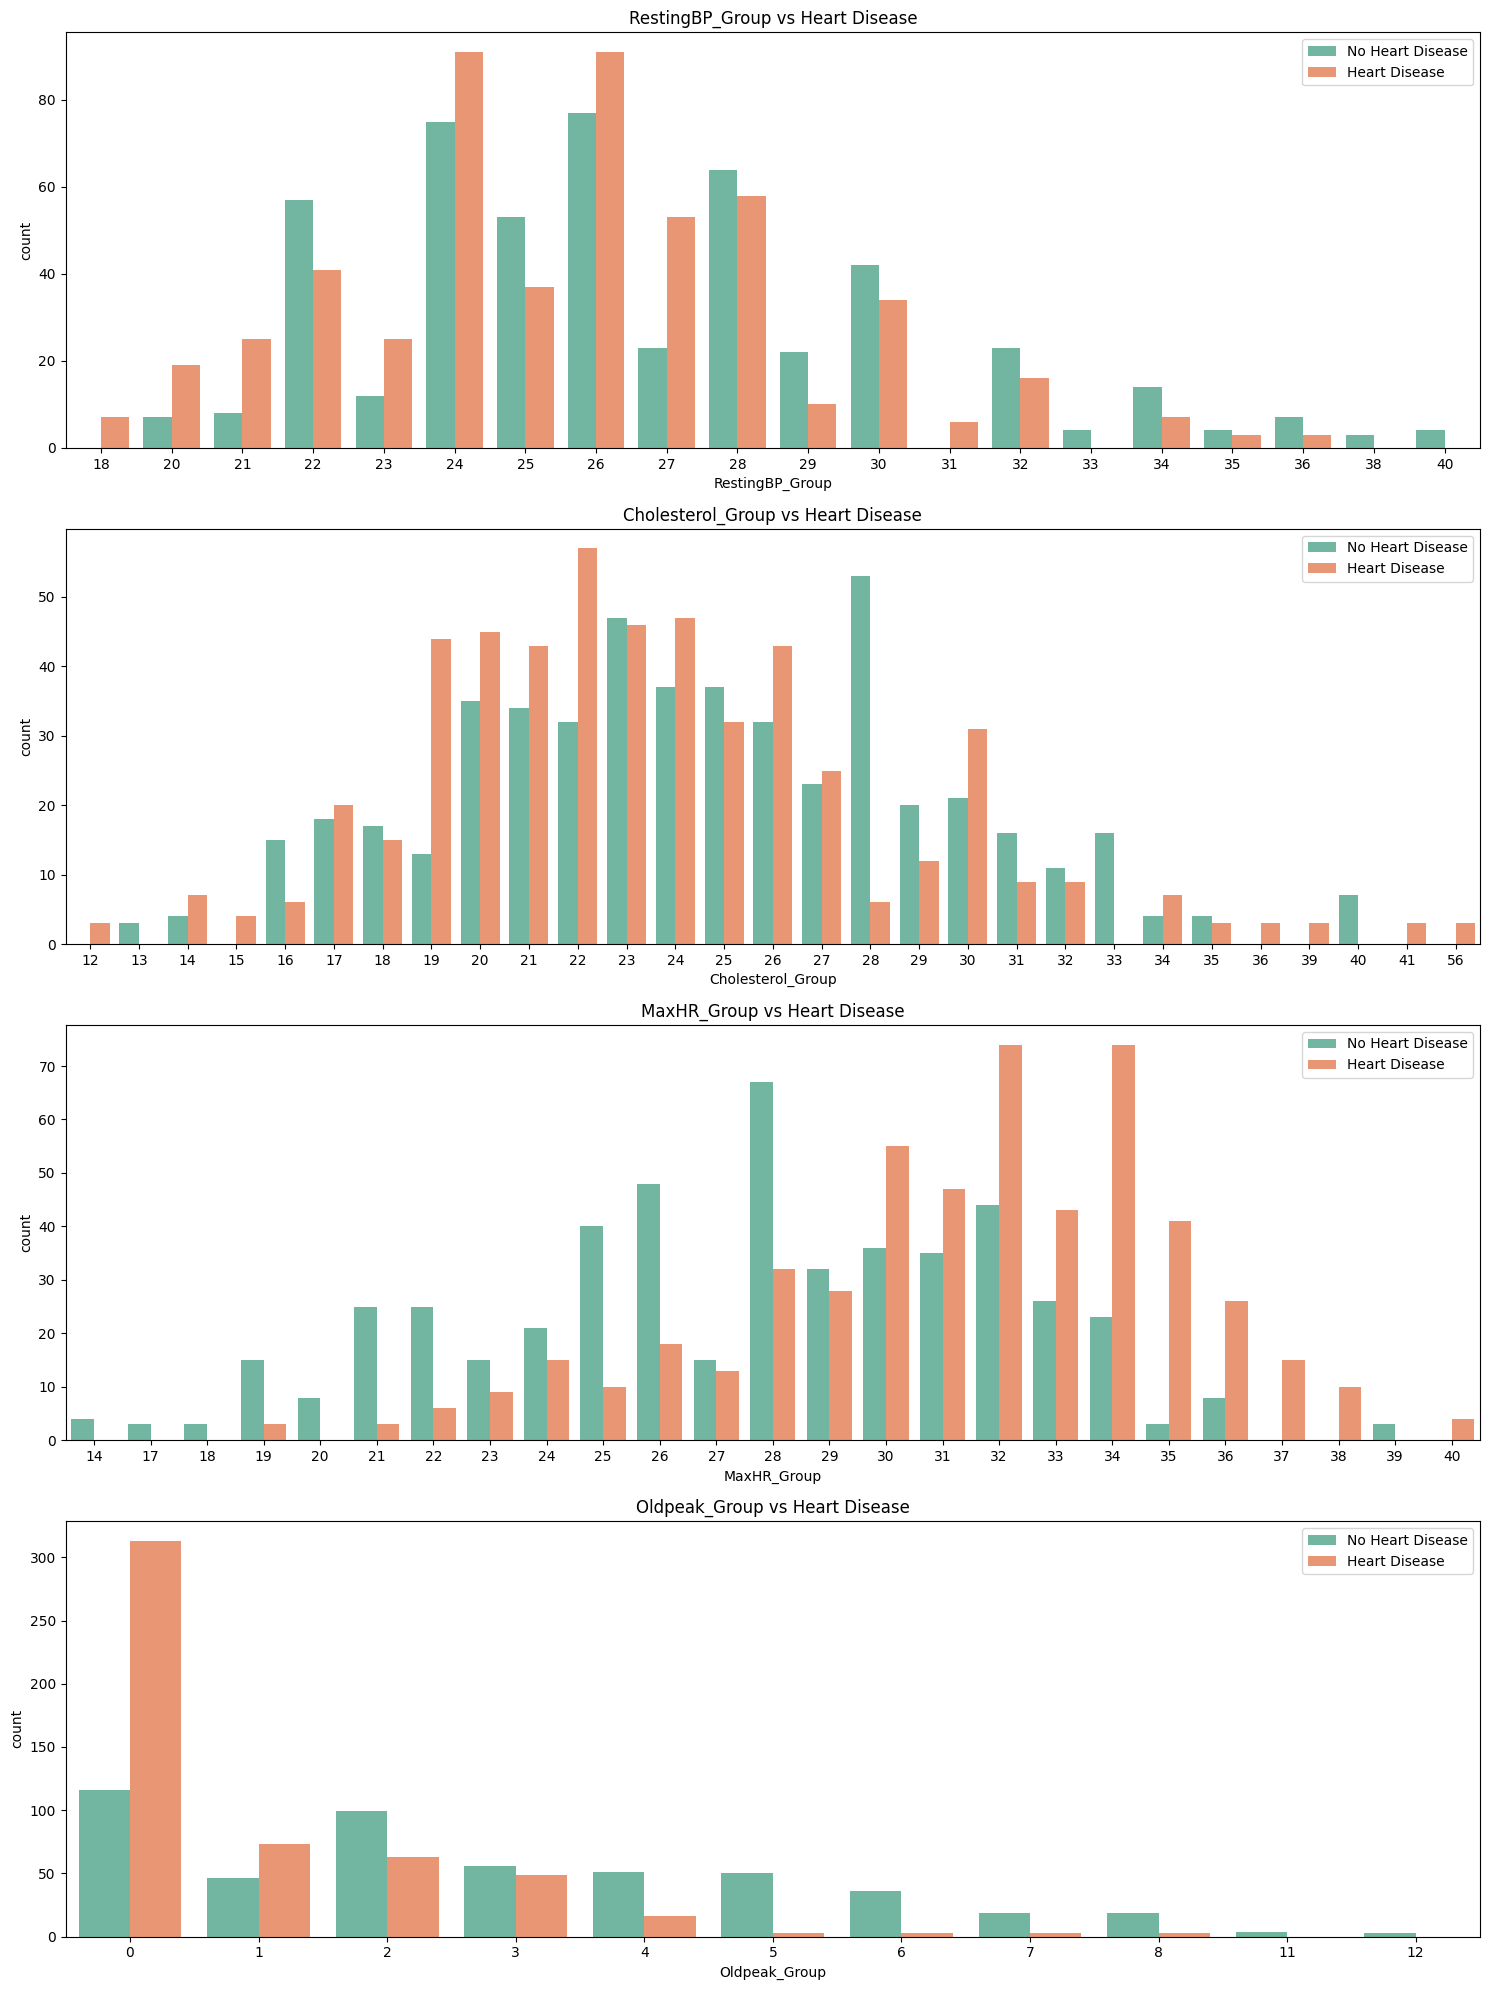

In [65]:
# Define your new variables for plotting
grouped_features = ['RestingBP_Group', 'Cholesterol_Group', 'MaxHR_Group', 'Oldpeak_Group']

# Calculate the number of rows needed for subplots (one plot per grouped feature)
nrows = len(grouped_features)

# Create subplots with one column and a number of rows equal to the number of features
fig, axs = plt.subplots(nrows=nrows, ncols=1, figsize=(15, nrows * 5))

# Check if axs is not an array, which happens when nrows is 1
if nrows == 1:
    axs = [axs]

# Plotting
for i, feature in enumerate(grouped_features):
    sns.countplot(x=feature, data=data, hue="HeartDisease", palette="Set2", ax=axs[i])
    axs[i].set_title(f'{feature} vs Heart Disease')
    axs[i].legend(['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

In [66]:
###  Numerical features vs Categorical features w.r.t Target variable(HeartDisease)

#  Sex vs Numerical Features

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);


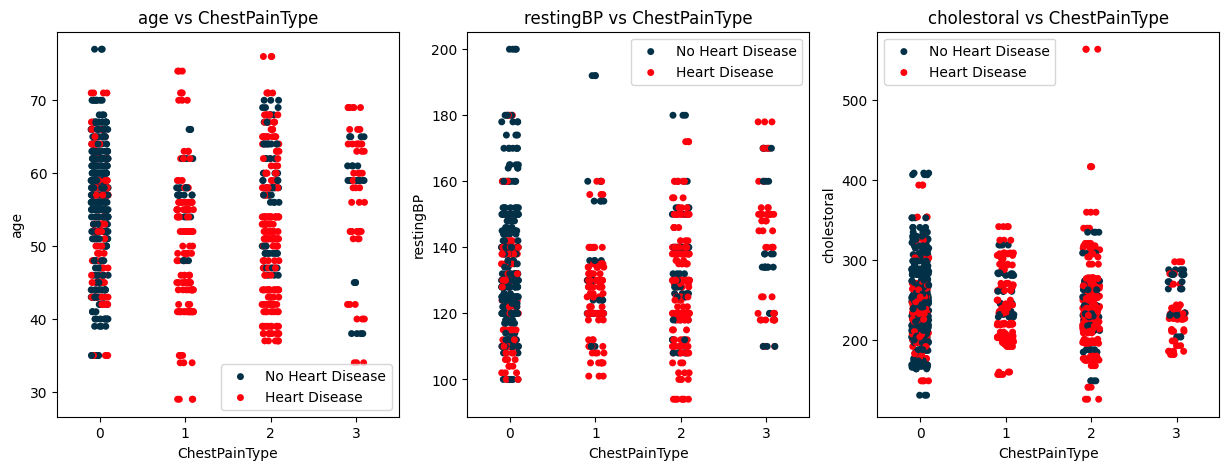

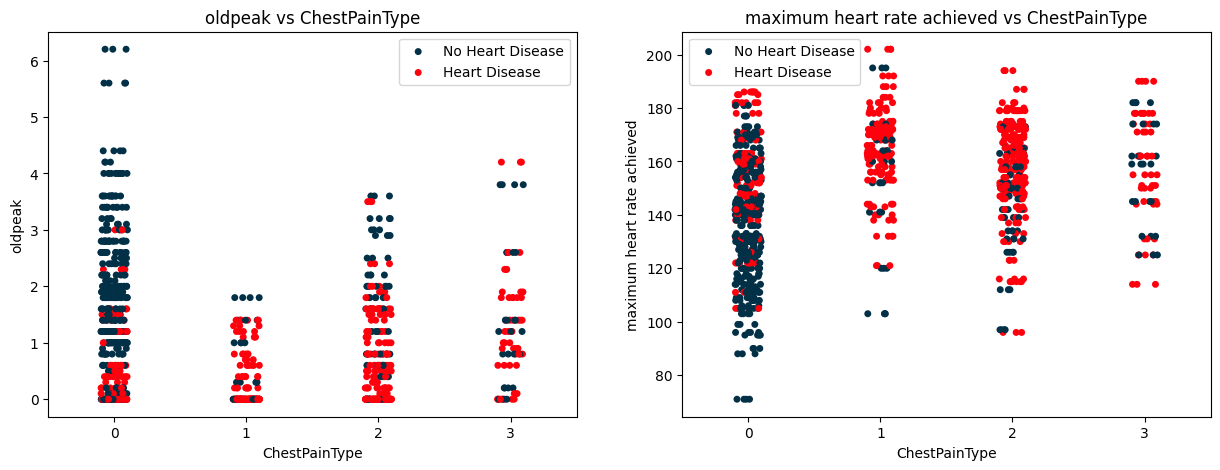

In [67]:
### ChestPainType vs Numerical Features

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

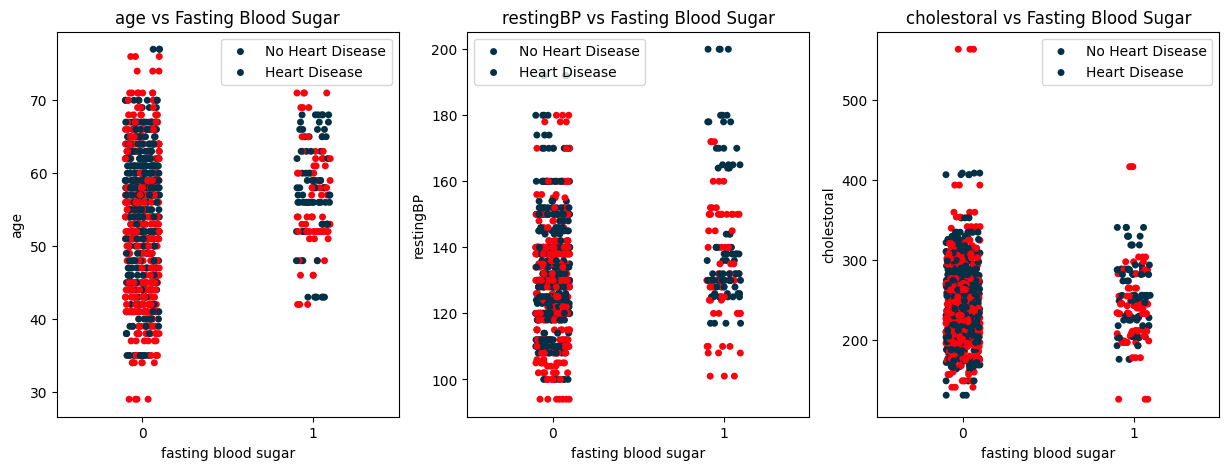

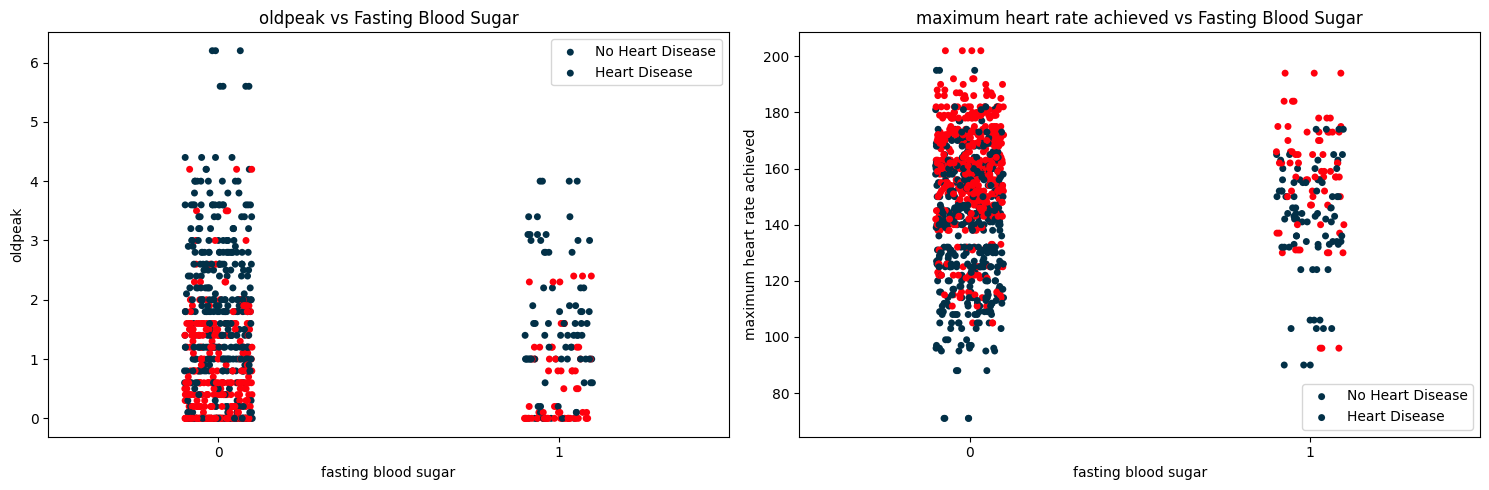

In [70]:
###  FastingBS vs Numerical features

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'fasting blood sugar',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for i, index in enumerate([-1, -2], start=1):
    plt.subplot(1, 2, i)
    sns.stripplot(x='fasting blood sugar', y=numerical_features[index], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[index] + ' vs Fasting Blood Sugar'
    plt.title(title)
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()


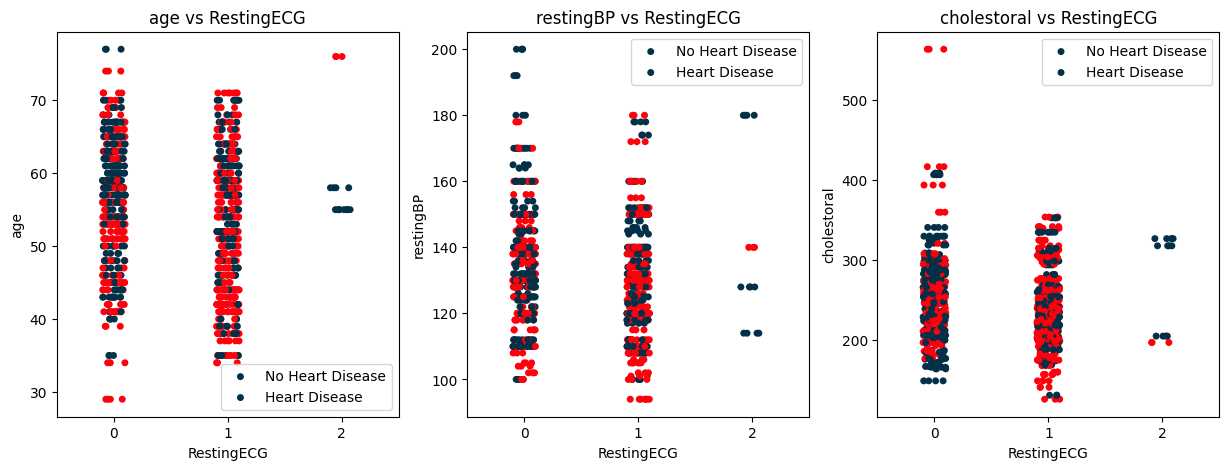

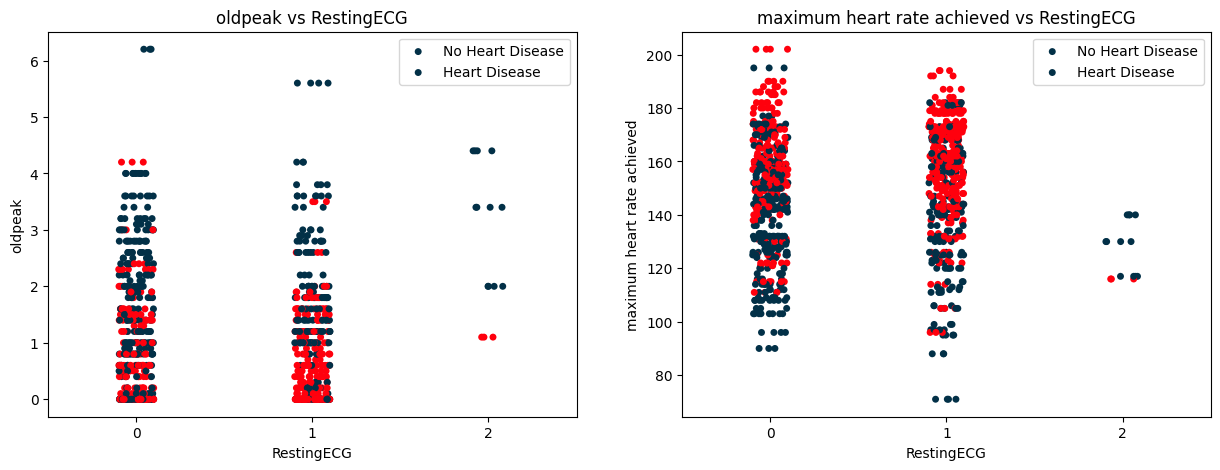

In [71]:
###  RestingECG vs Numerical Features

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);


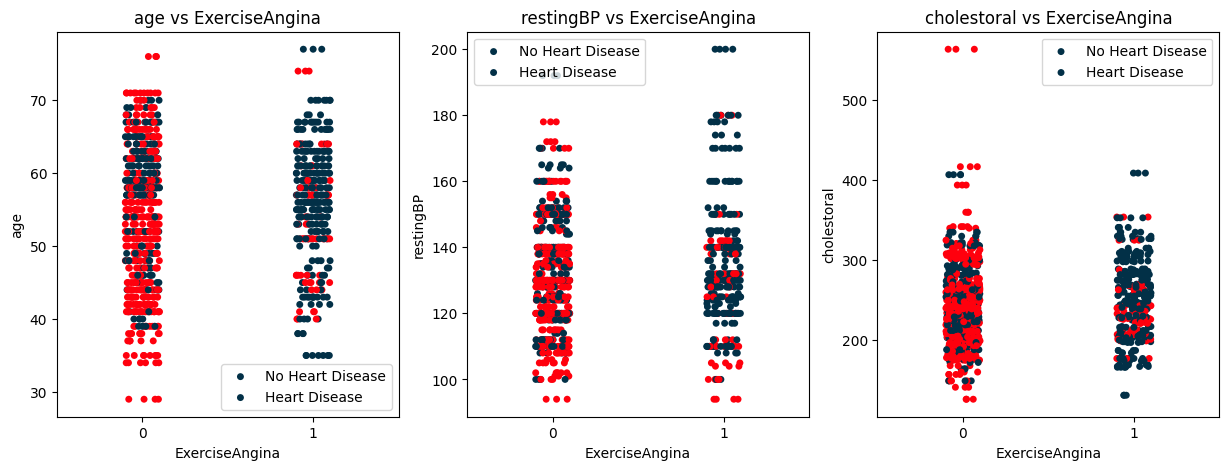

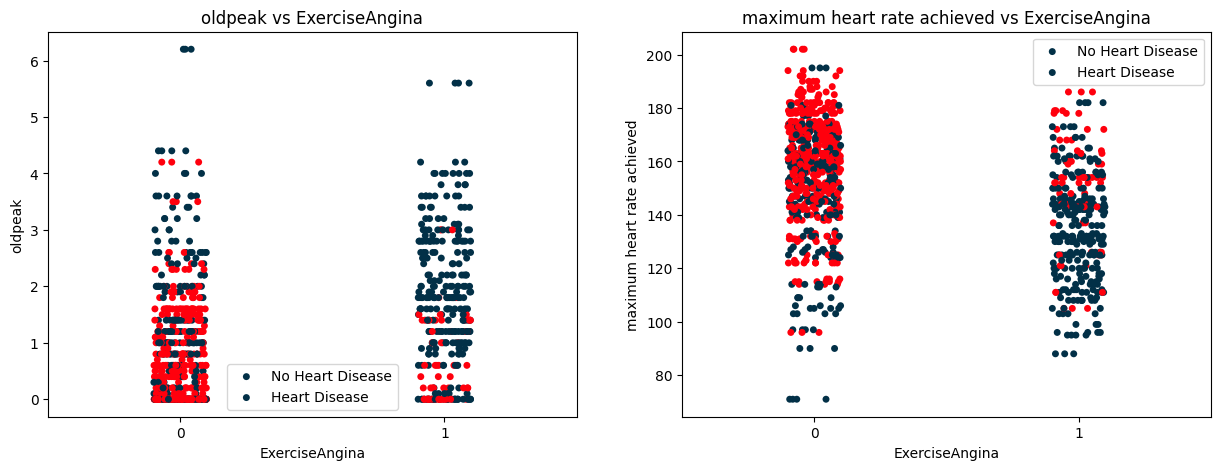

In [72]:
### ExerciseAngina vs Numerical Features

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

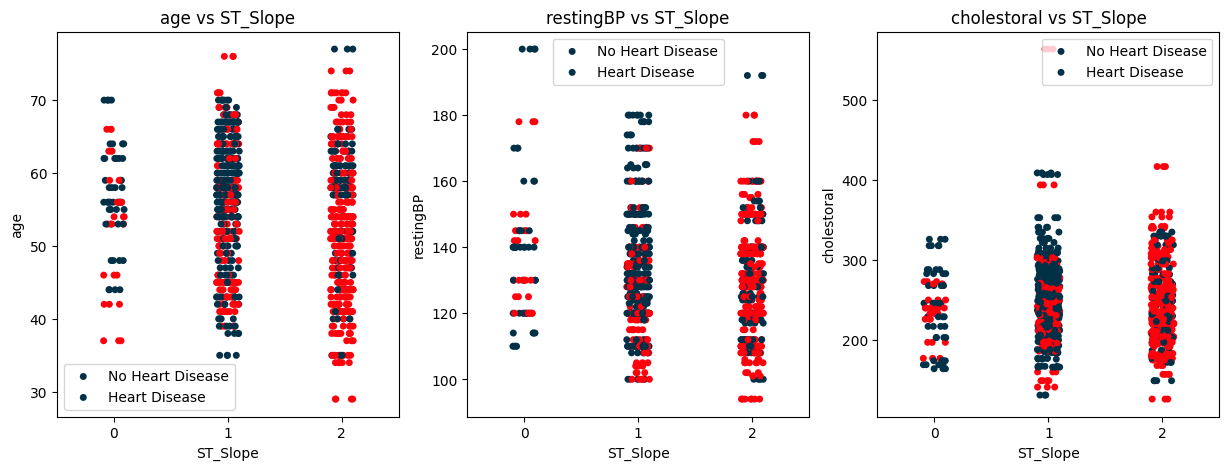

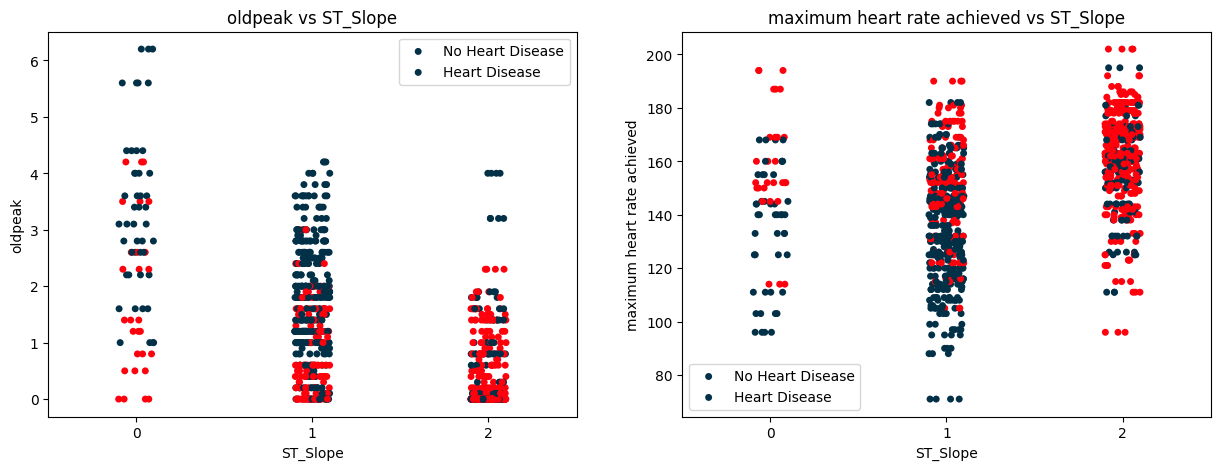

In [73]:
### ST_Slope vs Numerical Features

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

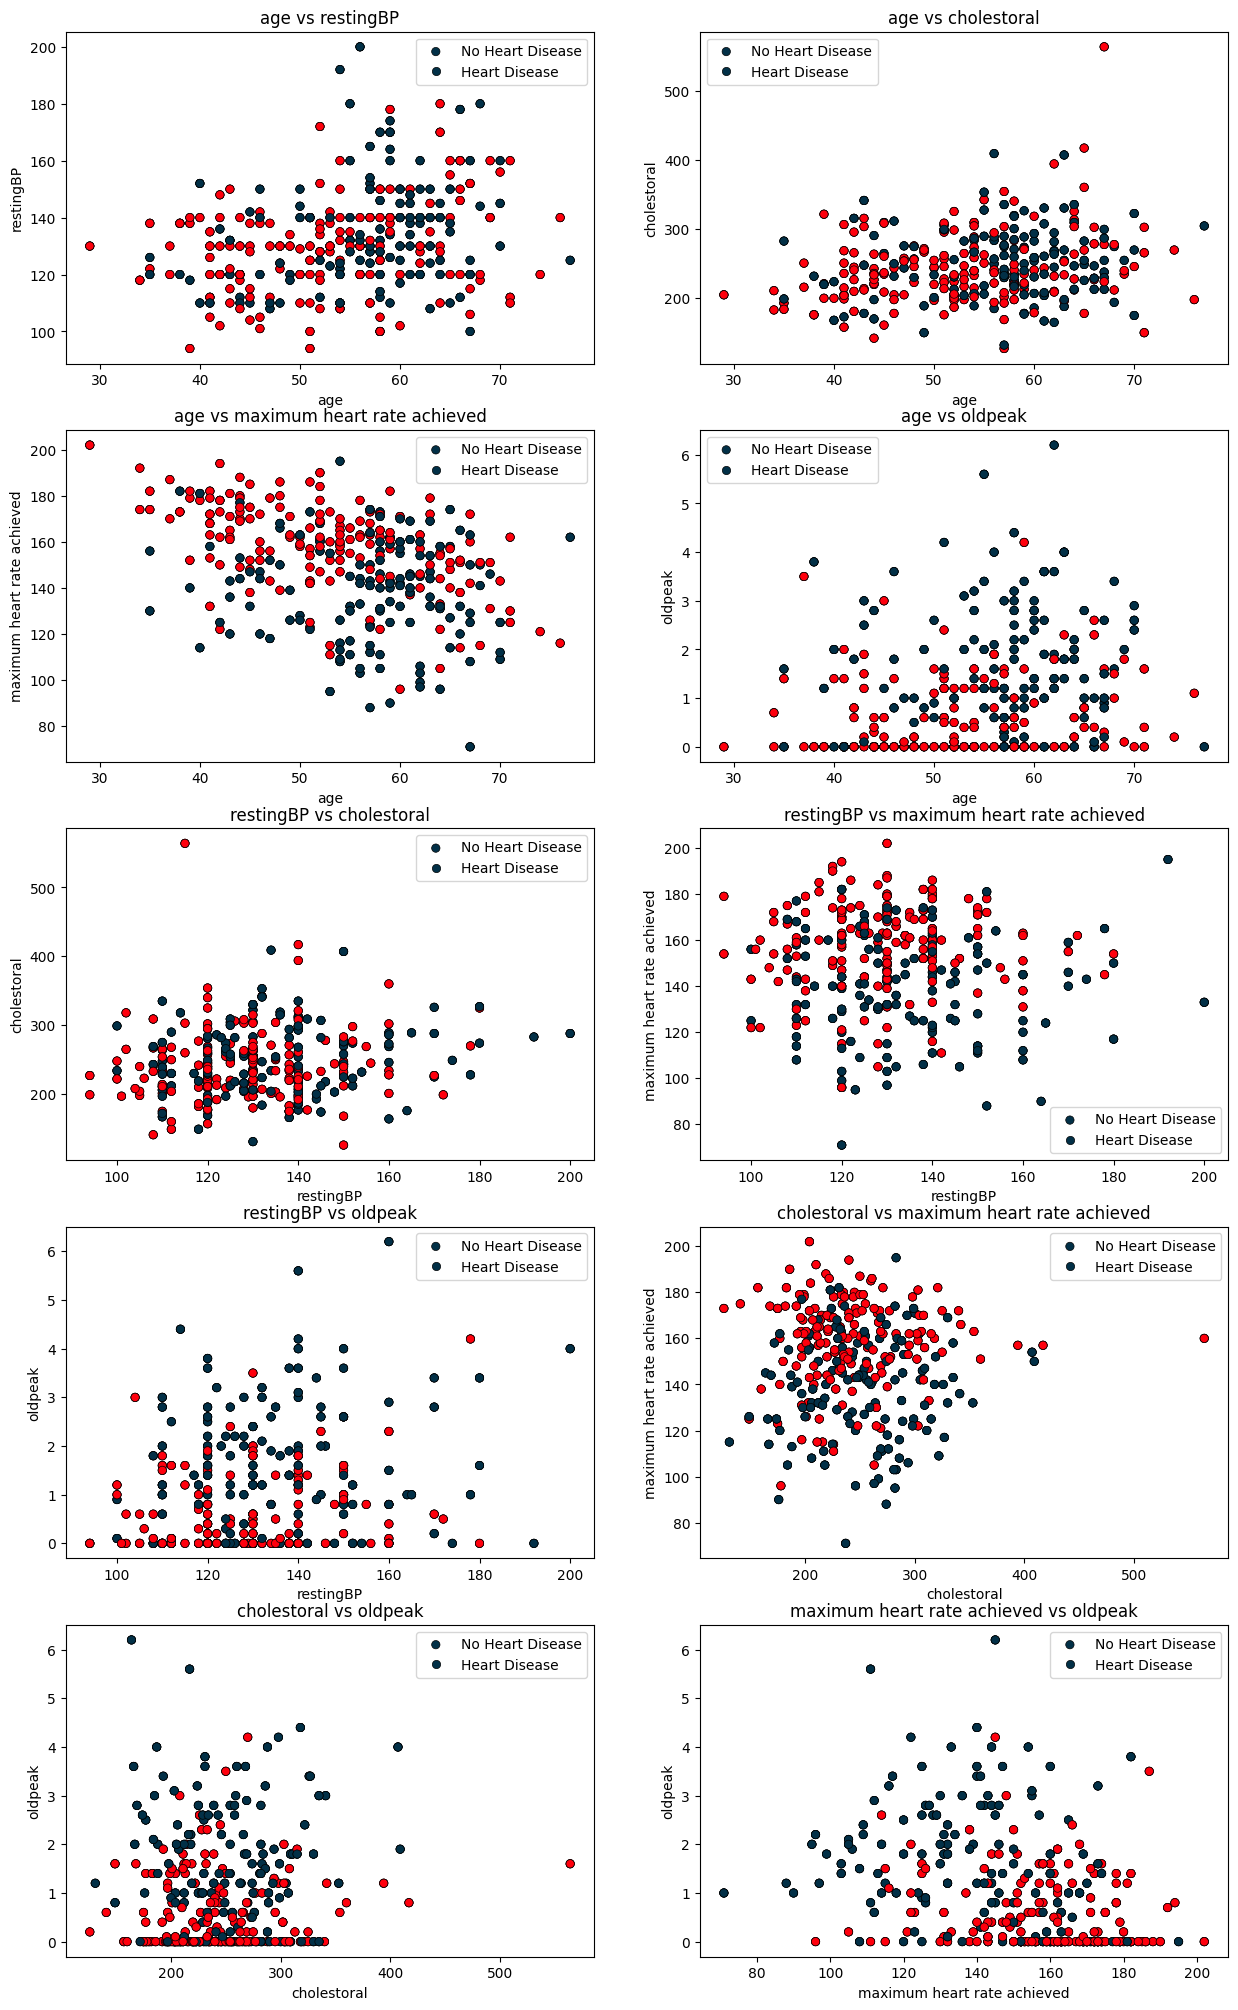

In [74]:
###  Numerical features vs Numerical features w.r.t Target variable(HeartDisease)

a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (15,25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'HeartDisease',palette = colors, edgecolor = 'black');
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

In [80]:
###   Feature Engineering

# Data Scaling

from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['oldpeak'] = mms.fit_transform(df1[['oldpeak']])
df1['age'] = ss.fit_transform(df1[['age']])
df1['restingBP'] = ss.fit_transform(df1[['restingBP']])
df1['cholestoral'] = ss.fit_transform(df1[['cholestoral']])
df1['maximum heart rate achieved'] = ss.fit_transform(df1[['maximum heart rate achieved']])
df1.head()

age  Sex  ChestPainType  restingBP  cholestoral  fasting blood sugar  \
0 -0.27    1              0      -0.38        -0.66                    0   
1 -0.16    1              0       0.48        -0.83                    1   
2  1.72    1              0       0.76        -1.40                    0   
3  0.72    1              0       0.94        -0.83                    0   
4  0.83    0              0       0.36         0.93                    1   

   RestingECG  maximum heart rate achieved  ExerciseAngina  oldpeak  ST_Slope  \
0           1                         0.82               0     0.16         2   
1           0                         0.26               1     0.50         0   
2           1                        -1.05               1     0.42         0   
3           1                         0.52               0     0.00         2   
4           1                        -1.87               0     0.31         1   

   ca  thal  HeartDisease  
0   2     3             0  
1   0     3             0  
2   0     3             0  
3   1     3             0  
4   3     2             0

In [81]:
#### Correlation Matrix

plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);


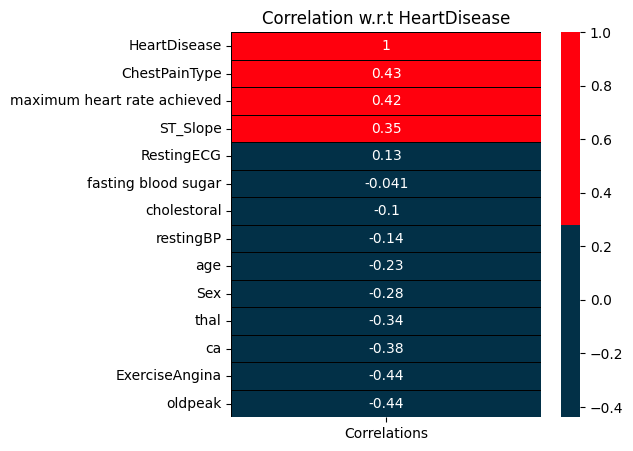

In [82]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

In [83]:
## Feature selection for categorical features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [85]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

In [87]:
### Feature Selection for Numerical Features

from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

MOdel

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [90]:
features = df1[df1.columns.drop(['HeartDisease','restingBP','RestingECG'])].values
target = df1['HeartDisease'].values

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [102]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def model(classifier):

    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Accuracy : ", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Cross Validation Score : ", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score : ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))

    # Plotting ROC Curve using RocCurveDisplay
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC Plot')
    plt.show()

def model_evaluation(classifier):
    # Assuming 'colors' is a predefined list of color codes for the heatmap
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap=colors, fmt='')

    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test)))

# Make sure to replace 'x_train', 'x_test', 'y_train', 'y_test' with your actual data variables
# Also, replace 'classifier_lr' with your actual classifier instance and 'colors' with your color palette for the heatmap


In [103]:
### Logistick Regression

from sklearn.linear_model import LogisticRegression

In [106]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

In [107]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

Accuracy :  80.98%
Cross Validation Score :  91.05%
ROC_AUC Score :  81.12%


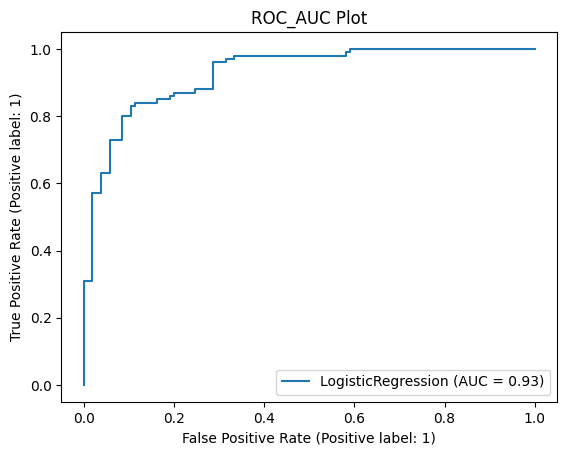

In [108]:
model(classifier_lr)


In [109]:
model_evaluation(classifier_lr)

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       105
           1       0.77      0.87      0.82       100

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [110]:
### support vector machine

from sklearn.svm import SVC

In [111]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Accuracy :  82.93%
Cross Validation Score :  90.36%
ROC_AUC Score :  83.14%


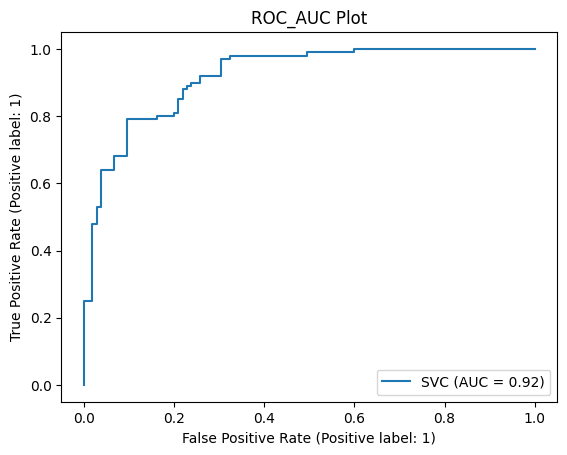

In [112]:
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       105
           1       0.77      0.92      0.84       100

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



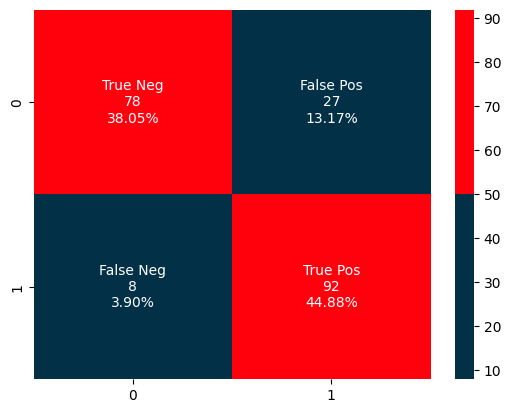

In [113]:
model_evaluation(classifier_svc)

In [114]:
### Decision tree classifier

from sklearn.tree import DecisionTreeClassifier


In [115]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy :  85.37%
Cross Validation Score :  93.59%
ROC_AUC Score :  85.36%


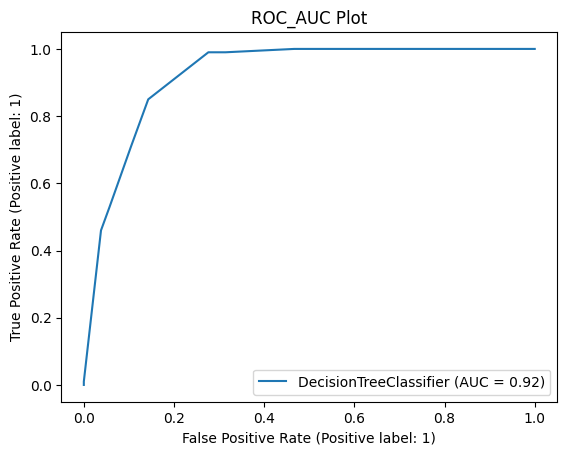

In [116]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.85      0.85      0.85       100

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



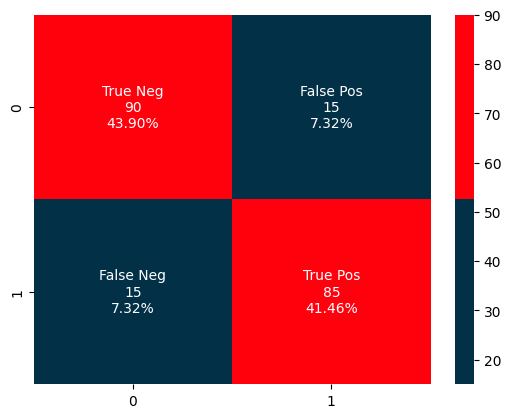

In [117]:
model_evaluation(classifier_dt)

In [118]:
### Random forest classifier

from sklearn.ensemble import RandomForestClassifier

In [119]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Accuracy :  87.80%
Cross Validation Score :  95.95%
ROC_AUC Score :  87.88%


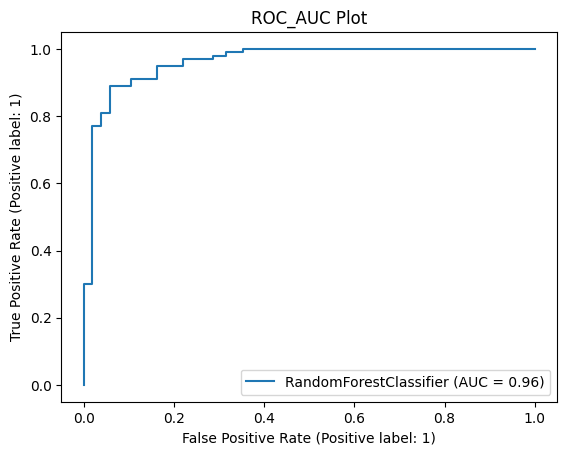

In [120]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       105
           1       0.85      0.91      0.88       100

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



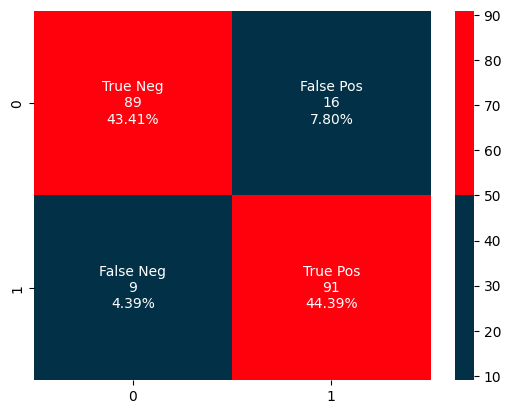

In [122]:
model_evaluation(classifier_rf)